# Optimizing Term Deposit Sales
## Bank Marketing Success Prediction


# 1. Problem Statement
- The project aims to increase subscription rates for a banking institution by predicting the success of direct marketing campaigns.
- Analyze a large data set of customer interactions with a Portuguese bank, collected via phone calls, to identify the key factors that influence subscription rates. 
- Using data mining techniques, we will develop a robust model to predict subscription rates with high accuracy. 
- By optimizing marketing campaigns based on our findings, we can improve the banking institution's customer satisfaction and achieve our project objective.



# 2. Project Definition of Variables

# Data set
bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010). The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).
- Number of Instances: 41188 for bank-additional-full.csv
- Number of Attributes: 20 + output attribute.

# Attribute information
## 1) Input variables:
### bank client data:
1. age (numeric)
2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
5. default: has credit in default? (categorical: "no","yes","unknown")
6. housing: has housing loan? (categorical: "no","yes","unknown")
7. loan: has personal loan? (categorical: "no","yes","unknown")

### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: "cellular","telephone") 
9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
11. duration: last contact duration, in seconds (numeric).

### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)     
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

## 2) Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: "yes","no")

## 3) Missing Attribute Values
- There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

# 3. Data Exploration 
### 3.1. Import Data and Necessary Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier

In [ ]:
# importing the dataset
df = pd.read_csv('bank-additional/bank-additional-full.csv', delimiter=';')
df.head()

### 3.2. Start EDA Process

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will first examine the overall structure to understand our data and gain ideas for future analysis.

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


We will divide our features into three categories based on the data types: numerical, categorical variables, and the target variable.

In [ ]:
col_names = []

for names in df.columns:
    col_names.append(names)

col_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
def column_types(df):
  '''
  Identifies numerical and categorical columns in a pandas DataFrame and saves their column names in separate lists.

  Parameters
  ----------
  df : pandas DataFrame
      The DataFrame to identify numerical and categorical columns in.

  Returns
  -------
  tuple
      A tuple of two lists, where the first list contains the names of numerical columns and the second list
      contains the names of categorical columns.
  '''
  # identify numerical columns and save their names in a list
  num_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

  # identify categorical columns and save their names in a list
  cat_cols = list(df.select_dtypes(include=['object']).columns)

  return num_cols, cat_cols

In [ ]:
int_names, cat_names = column_types(df)
target_name = ['y']

In [ ]:
int_names

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
cat_names

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
target_name

['y']

We examine unique values to see our data's overall structure and find any necessary outliers and anomalies to manage.

In [ ]:
for name in col_names:
    print('Column Name:', name)
    print('Unique Values:', df[name].unique())
    print('Unique Value #:', len(df[name].unique()))
    print('')

Column Name: age
Unique Values: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique Value #: 78

Column Name: job
Unique Values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique Value #: 12

Column Name: marital
Unique Values: ['married' 'single' 'divorced' 'unknown']
Unique Value #: 4

Column Name: education
Unique Values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique Value #: 8

Column Name: default
Unique Values: ['no' 'unknown' 'yes']
Unique Value #: 3

Column Name: housing
Unique Values: ['no' 'yes' 'unknown']
Unique Value #: 3

Column Name: loan
Unique Values: ['no' 'yes' 'unknown']
Unique Value #: 3

Column 

In [ ]:
df['y'] = np.where(df['y'] == 'no', 0, 1)

As mentioned in the feature description, this data set has no null values, but values are categorized as 'unknown.' Rather than impute the 'unknown' values, we decide to consider them as one of the traits of our data.

In [ ]:
print('poutcome:', (df['poutcome'] == 'nonexistent').sum() / len(df) * 100, '%')

poutcome: 86.3431096435855 %


In [ ]:
feature_with_unknown = ['job', 'marital', 'default', 'housing', 'loan']

for feature in feature_with_unknown: 
    unknown_obs = (df[feature] == 'unknown').sum()
    total_obs = len(df) 
    print(feature, 'unknown_ratio:', unknown_obs / total_obs * 100, '%')

job unknown_ratio: 0.8012042342429834 %
marital unknown_ratio: 0.1942313295134505 %
default unknown_ratio: 20.87258424783918 %
housing unknown_ratio: 2.40361270272895 %
loan unknown_ratio: 2.40361270272895 %


We create a pair plot to better understand our data before analysis by visualizing correlations and identifying distinct patterns or outliers.

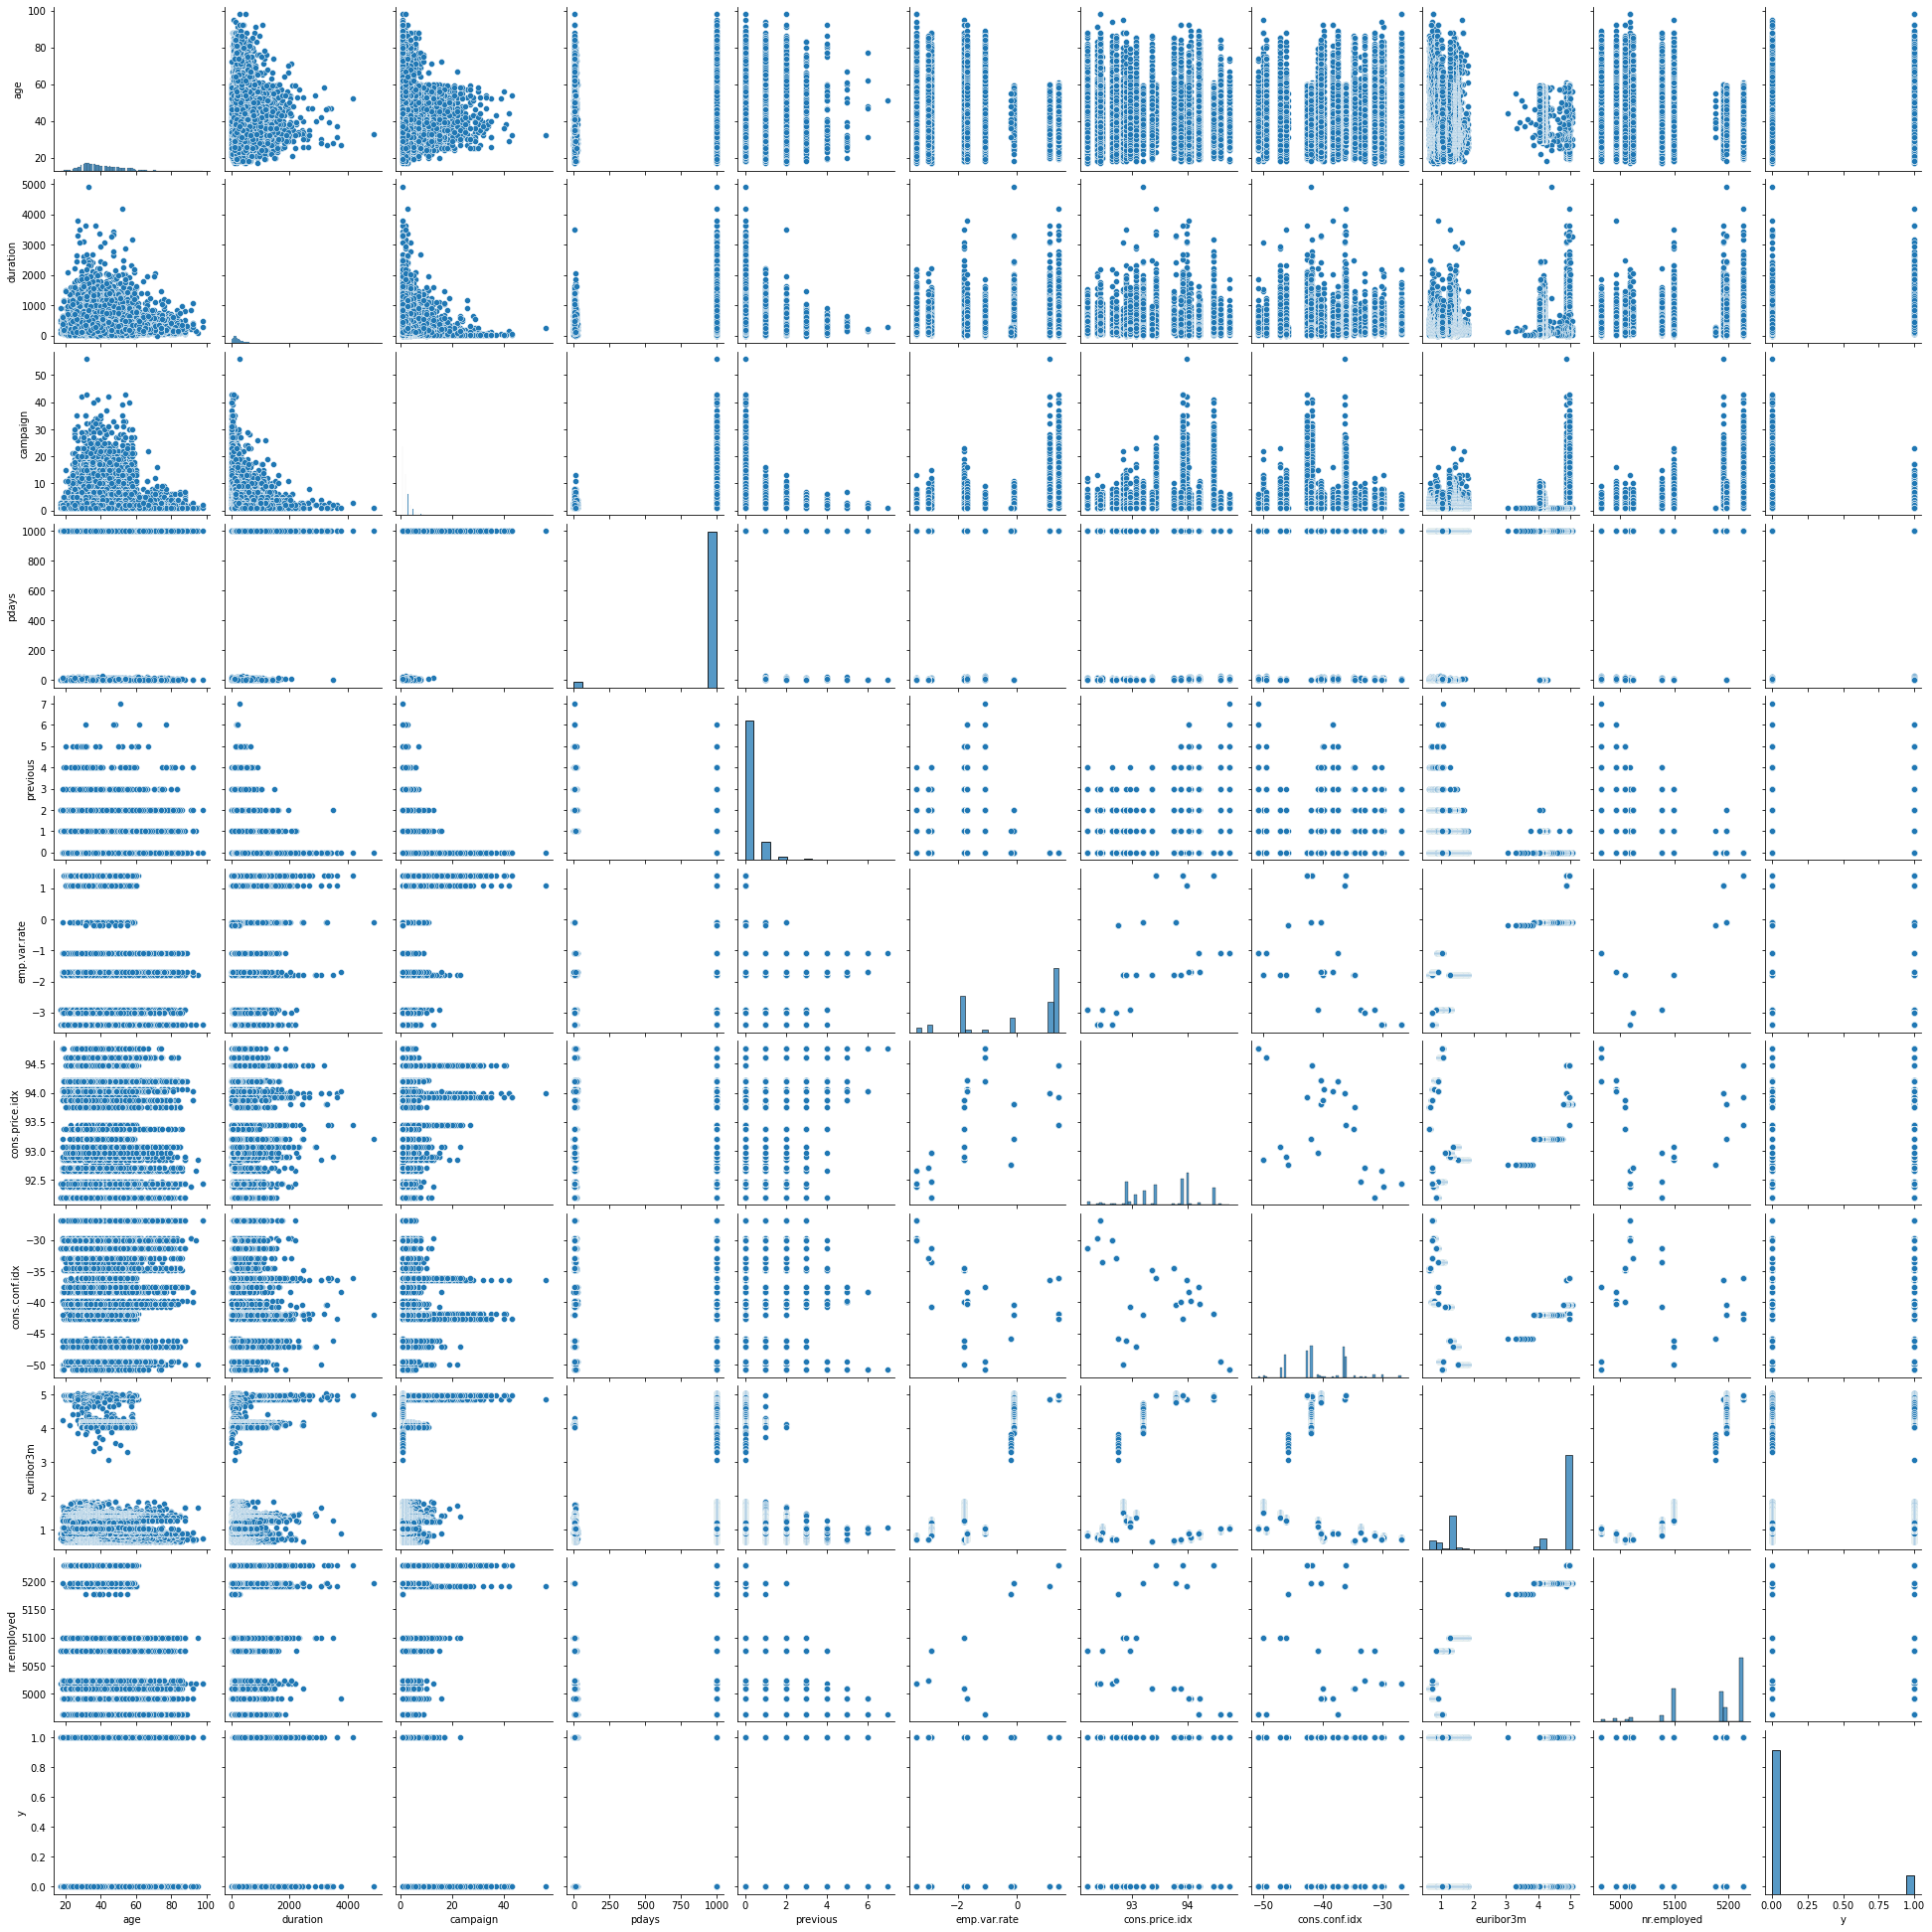

In [ ]:
sns.pairplot(df)

We will create basic plots using all features in our data set to explore further and understand our data. In the case of numerical variables, we generate distribution plots, and for our categorical variables, we create count plots. 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


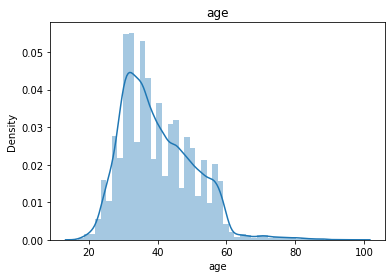

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


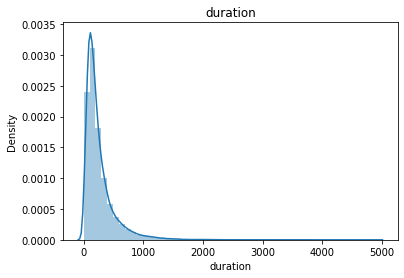

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


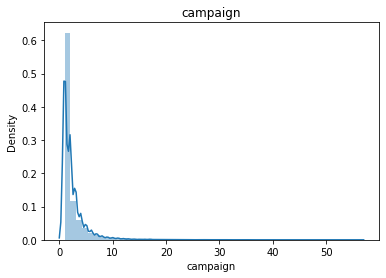

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


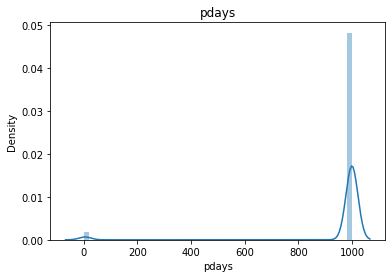

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


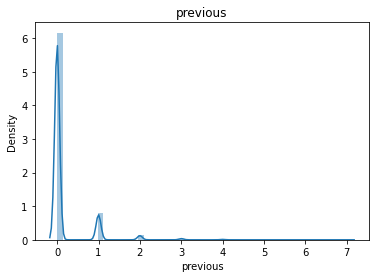

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


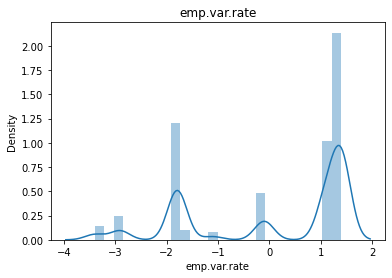

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


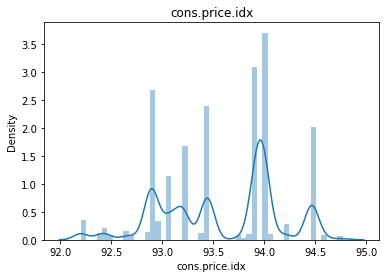

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


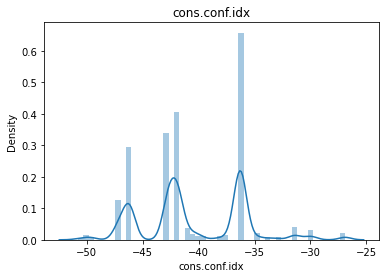

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


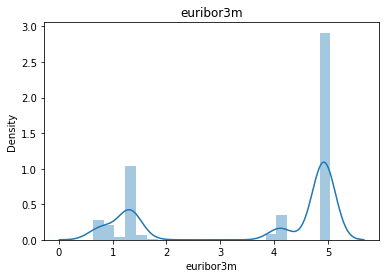

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


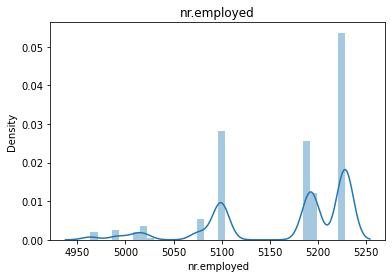

In [ ]:
for name in int_names:
    sns.distplot(df[name])
    plt.title(name)
    plt.show()

Note that the majority of values in pdays is 999, which indicates that one customer has never been contacted with the marketing purpose before, according to the feature description.

In [ ]:
df['pdays'].value_counts(ascending = False)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

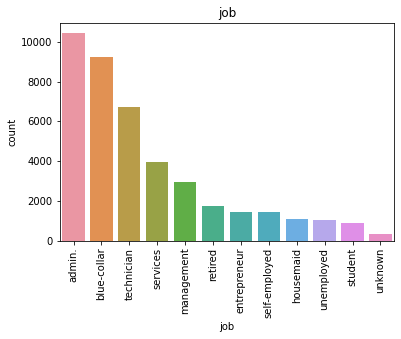

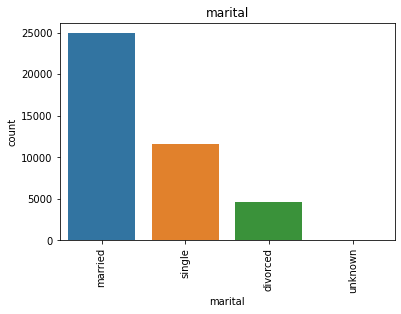

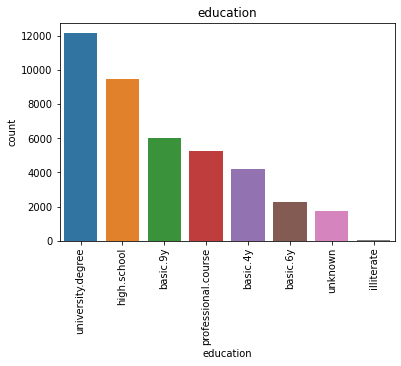

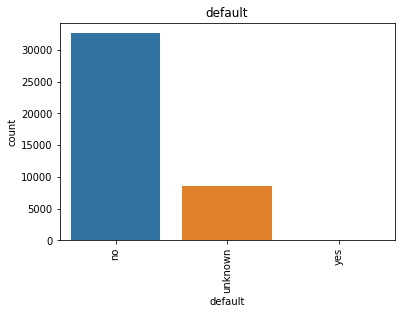

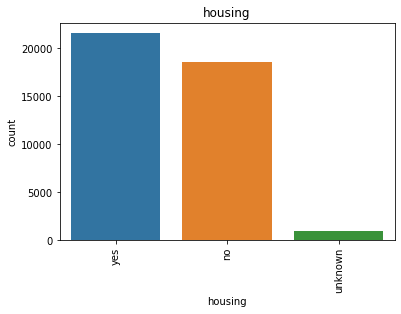

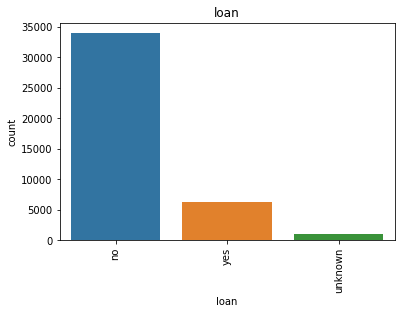

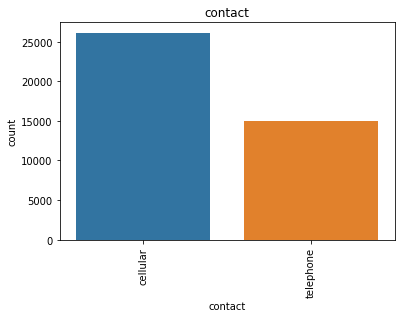

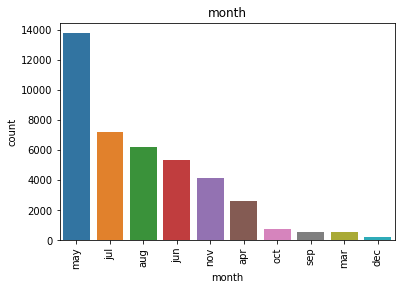

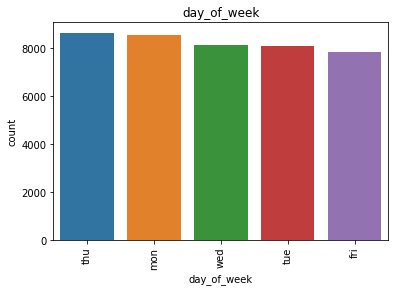

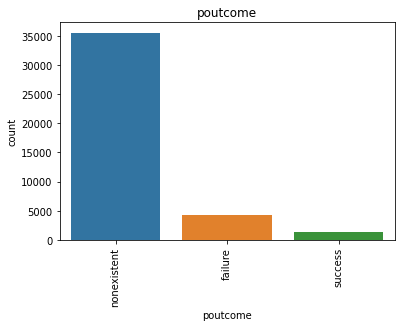

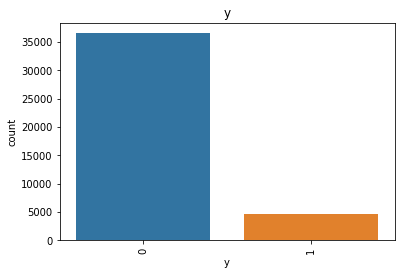

In [ ]:
for name in cat_names:
    sns.countplot(x=name, data=df, order=df[name].value_counts().index[::1])
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show()

We will add one more layer to the created plot to see how the particular feature relates to the target variable 'y' that indicates whether our customer subscribed to the deposit service through tele marketing. 

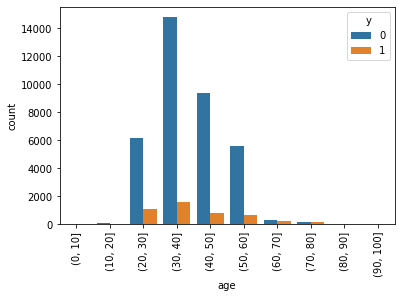

In [ ]:
age_groups = pd.cut(df.age, bins=range(0, 110, 10))

sns.countplot(x=age_groups, hue="y", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['y'].groupby(age_groups).sum() / df['y'].groupby(age_groups).count() * 100

age
(0, 10]            NaN
(10, 20]     40.714286
(20, 30]     14.731465
(30, 40]      9.746720
(40, 50]      8.173828
(50, 60]     10.653907
(60, 70]     43.442623
(70, 80]     47.194719
(80, 90]     49.541284
(90, 100]    50.000000
Name: y, dtype: float64

- The majority in our age group is 30's. 
- The age range between 30 - 40 takes up to 65% of the total observations.
- Even though the absolute number of 'yes' is highest in 30's, but the ratio of 'yes' appears much higher in 60's.

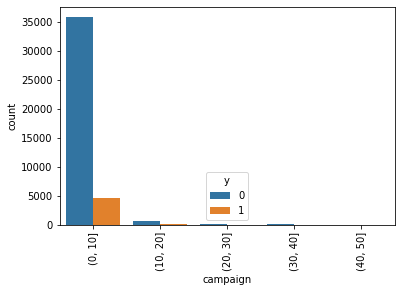

In [ ]:
campaign_groups = pd.cut(df.campaign, bins=range(0, 60, 10))
sns.countplot(x=campaign_groups, hue="y", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['y'].groupby(campaign_groups).sum() / df['y'].groupby(campaign_groups).count() * 100

campaign
(0, 10]     11.441256
(10, 20]     3.651685
(20, 30]     0.806452
(30, 40]     0.000000
(40, 50]     0.000000
Name: y, dtype: float64

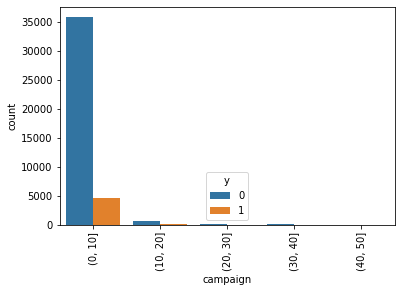

In [ ]:
previous_groups = pd.cut(df.campaign, bins=range(0, 60, 10))
sns.countplot(x=previous_groups, hue="y", data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['y'].groupby(previous_groups).sum() / df['y'].groupby(previous_groups).count() * 100

campaign
(0, 10]     11.441256
(10, 20]     3.651685
(20, 30]     0.806452
(30, 40]     0.000000
(40, 50]     0.000000
Name: y, dtype: float64

Now, we start to explore our categorical variables with an added layer that results from our target variable. 

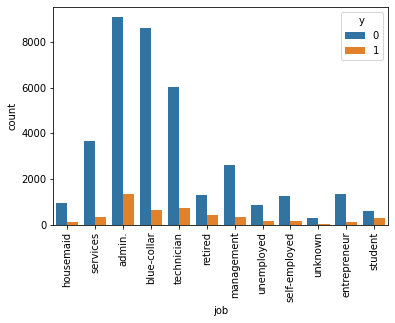

In [ ]:
sns.countplot(x='job', hue='y', data=df)
 
plt.xticks(rotation=90)

plt.show()

In [ ]:
df['job'].value_counts(normalize = True)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

- The most favorable groups (student, retired) only take up to 8% of the total customers 
- These groups: 'management' and 'admin.' are moderately favorable to term deposit and at the same time take up to 31% of the total customers, and therefore could have strong relationship with the result.

In [ ]:
df.groupby('job')['job'].count() / len(df)

job
admin.           0.253035
blue-collar      0.224677
entrepreneur     0.035350
housemaid        0.025736
management       0.070992
retired          0.041760
self-employed    0.034500
services         0.096363
student          0.021244
technician       0.163713
unemployed       0.024619
unknown          0.008012
Name: job, dtype: float64

- What if we divide jobs into 3 categories to see the relationships?
- The suggested new categories are: (blue-collar + technician), (management+admin.), and others

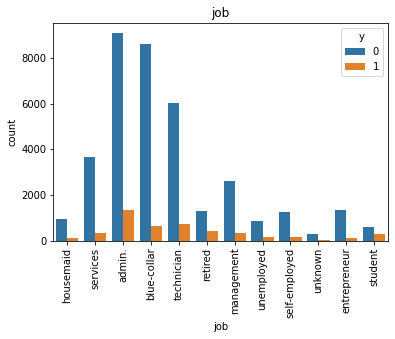

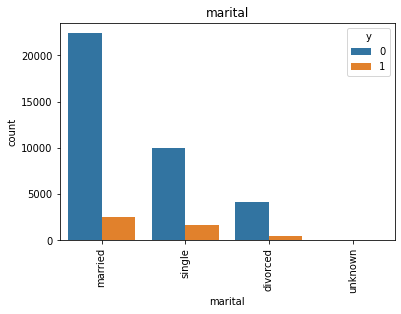

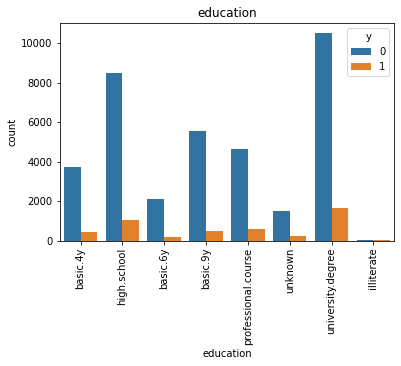

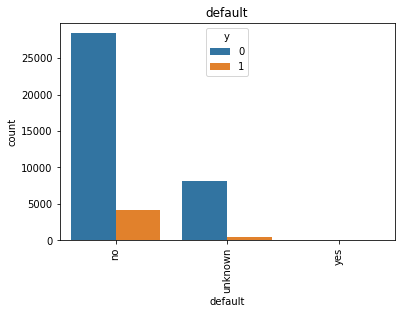

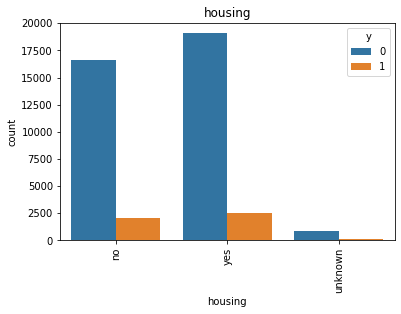

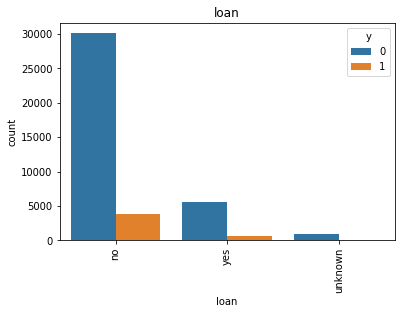

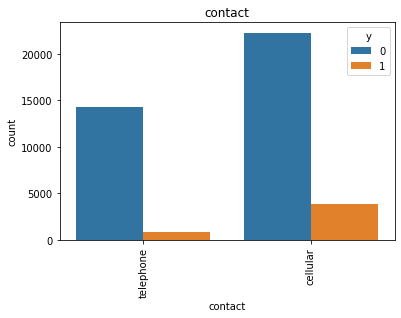

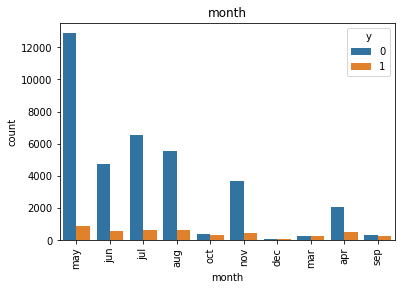

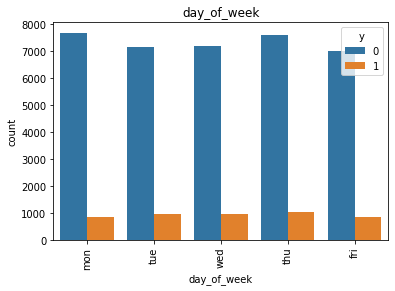

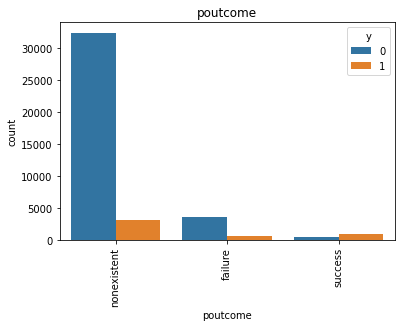

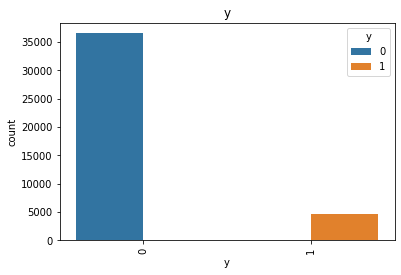

In [ ]:
for name in cat_names:
    sns.countplot(x=name, hue='y', data=df)
    plt.xticks(rotation=90)
    plt.title(name)
    plt.show()

In [ ]:
for name in cat_names:
    yes = df['y'].groupby(df[name]).sum()
    total = df['y'].groupby(df[name]).count()
    y_ratio = (yes / total).sort_values(ascending = False) * 100
    print(name)
    print(y_ratio)
    print('')

job
job
student          31.428571
retired          25.232558
unemployed       14.201183
admin.           12.972558
management       11.217510
unknown          11.212121
technician       10.826042
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.138070
blue-collar       6.894316
Name: y, dtype: float64

marital
marital
unknown     15.000000
single      14.004149
divorced    10.320902
married     10.157253
Name: y, dtype: float64

education
education
illiterate             22.222222
unknown                14.500289
university.degree      13.724523
professional.course    11.348465
high.school            10.835523
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
Name: y, dtype: float64

default
default
no         12.878974
unknown     5.152960
yes         0.000000
Name: y, dtype: float64

housing
housing
yes        11.619392
no         10.879605
unknown    10.808081
Name: y, dtype: float6

- 'job,' 'default,' 'housing,' 'loan', 'month,' and 'outcome' show distinct 'yes' ratios between categories. 
    - If someone experienced 'default' before, they avoid joining our term deposit. Customers with consumption patterns resulting in 'default 'may not prefer our term deposit.
    - If someone has no house, they prefer joining term deposit. The deposit could be invested to buy a house in the future.
    - If someone has a loan, they prefer to avoid joining our term deposit. They might need more available monetary sources for deposits due to the loan.
- March, December, and September have a high 'yes' ratio, but the absolute number of phone calls made was few. 
	- This might indicate a time delay between our telemarketing and joining our subscription service. 
- A customer tended to join more if they joined before our bank product through marketing. 

Finally, we finish our EDA process confirming that this data is highly imbalanced in the target variable between 'yes(11%)' or no(89%)' and the further necessity to use upsampling techniques from our observations to increase the predictive power. 

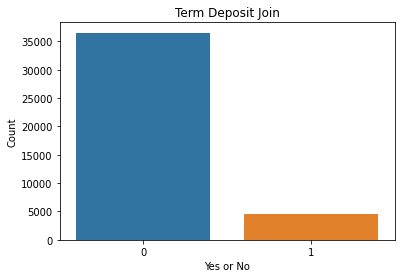

In [ ]:
sns.countplot(x = 'y', data=df)

plt.xlabel('Yes or No')
plt.ylabel('Count')
plt.title('Term Deposit Join')

plt.show()

In [ ]:
class_distribution = df['y'].value_counts(normalize=True)
print(class_distribution)

0    0.887346
1    0.112654
Name: y, dtype: float64


### 3.3. EDA Analysis Results

1.   Overall, all 17 features in the dataset seem relevant to the target variable y.
    * However, we would see the significance of each variable through either a t-test or chi-squared test 
    * If we have a categorical variable with two or more categories, we could use a chi-squared test to determine if there is a significant association between that variable and the target variable. 
    * On the other hand, for numerical variables, we could use a t-test or ANOVA to determine if there is a significant difference between the means of different groups of the numerical variable.
2.   However, several features could be transformed to see a more substantial relationship with the target variable and reduce the model complexity after one hot encoding. The possible transformations are:
    *   'age': cut the age by ten and get ten categories
    *   'job': merge some job categories into (blue-collar + technician), (management+admin.), and others. However, this could depend on the definition of 'technician.'
    *   'day': cut the day by ten and get three categories so we can know whether we contacted our customer in the early, middle, or at the end of the month
    *   Other than these features, we could make buckets for 'contact,' 'duration,' 'campaign,' 'pday,' and 'previous' because the period could matter in these features.
    * Lastly, note that this data set has no null values, but has features with 'unknown' or 'nonexistent' values. We decided to maintain those values as they are for this time.
3. The data set is highly imbalanced, with 11% 'Yes' and 89% 'No.' It can lead to issues with the model's ability to predict the underrepresented class accurately.

### 3.1. Manage values: unknown
This section is all commented out as this approach did not work for us.


Consider 'unknown' values as nulls. Impute unknown values using K-means method. We iterate impute process for categorical variables that contain 'unknown' values.

In [ ]:
# unknown = ['job', 'contact', 'poutcome', 'education', 'housing', 'loan']

# for variable in unknown: 
#     print(df[variable].unique())

In [ ]:
# job_len = len(df['job'].unique()) - 1
# contact_len = len(df['contact'].unique()) - 1
# poutcome_len = len(df['poutcome'].unique()) - 1
# education_len = len(df['education'].unique()) - 1
# housing_len = len(df['housing'].unique()) - 1
# loan_len = len(df['loan'].unique()) - 1

# job_cat = df['job'].unique()
# job_cat = np.delete(job_cat, np.where(job_cat == 'unknown'))

# contact_cat = df['contact'].unique()
# contact_cat = np.delete(contact_cat, np.where(contact_cat == 'unknown'))

# poutcome_cat = df['poutcome'].unique()
# poutcome_cat = np.delete(poutcome_cat, np.where(poutcome_cat == 'unknown'))

# education_cat = df['education'].unique()
# education_cat = np.delete(education_cat, np.where(education_cat == 'unknown'))

# housing_cat = df['housing'].unique()
# housing_cat = np.delete(housing_cat, np.where(housing_cat == 'unknown'))

# loan_cat = df['loan'].unique()
# loan_cat = np.delete(loan_cat, np.where(loan_cat == 'unknown'))

In [ ]:
# # Finding the % of unknown values in the variables

# for col in df.columns:
#     if 'unknown' in df[col].unique():
#         unknown_count = df[col].value_counts()['unknown']
#         unknown_percentage = (unknown_count / df[col].count()) * 100
#         print(f"Column '{col}' has {unknown_percentage:.2f}% unknown values.")
#     else:
#         print(f"Column '{col}' has no 'unknown' values.")

In [ ]:
# cat_names

In [ ]:
# int_names

In [ ]:
# df_encoded = pd.get_dummies(df, columns = cat_names, prefix = cat_names)

In [ ]:
# df_encoded.info()

In [ ]:
# X = df_encoded.drop(['job_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
# y = df_encoded['job_unknown']

# train_X = X[y==0]
# test_X = X[y==1]

# kmeans = KMeans(n_clusters = job_len, random_state = 0).fit(train_X)
# pred_job = kmeans.predict(test_X)

# df.loc[y==1 , 'job'] = [job_cat[i] for i in pred_job]


In [ ]:
# X = df_encoded.drop(['job_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
# y = df_encoded['education_unknown']

# train_X = X[y == 0]
# text_X = X[y == 1]

# kmeans = KMeans(n_clusters = education_len, random_state = 0).fit(train_X)
# pred_education = kmeans.predict(text_X)

# df.loc[y==1, 'education'] = [education_cat[i] for i in pred_education]

In [ ]:
# X = df_encoded.drop(['job_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
# y = df_encoded['housing_unknown']

# train_X = X[y == 0]
# text_X = X[y == 1]

# kmeans = KMeans(n_clusters = housing_len, random_state = 0).fit(train_X)
# pred_housing = kmeans.predict(text_X)

# df.loc[y==1, 'housing'] = [housing_cat[i] for i in pred_housing]

In [ ]:
# X = df_encoded.drop(['job_unknown', 'education_unknown', 'housing_unknown', 'loan_unknown'], axis = 1)
# y = df_encoded['loan_unknown']

# train_X = X[y == 0]
# text_X = X[y == 1]

# kmeans = KMeans(n_clusters = loan_len, random_state = 0).fit(train_X)
# pred_loan = kmeans.predict(text_X)

# df.loc[y==1, 'loan'] = [loan_cat[i] for i in pred_loan]

Now, the imputation is done and our data set has no 'uknown' values in any columns.

In [ ]:
# unknown = ['job', 'education', 'housing', 'loan']

# for variable in unknown: 
#     print(df[variable].unique())

### 3.4. Start Feature Engineering

#### 3.4.1. Create a trimmed categorical variable
1) 'job'
- We have a job column, which has 11 values. In the EDA process, we examined the percentage of each job and estimated the possibility that we could combine job categories. 
- If we merge some job categories into (blue-collar + technician), (management+admin.), and others, this would create three types that roughly account for 30% of the feature, respectively. 

2) 'month'
- Month could be a noteworthy feature, but after one-hot encoding, it will produce 12 columns.
- Month can explain seasonal influence, so we divide them into four categories: Spring, Summer, Fall, and Winter. 
- Because the data was collected in Portugal, we will follow the geographical information
- Spring: March, April, and May
Summer: June, July, August, and September
Fall: October and November
Winter: December, January, and February

In [ ]:
# job_list = df['job'].unique()
# job_list = list(job_list)

# job_1 = ['management', 'admin.']
# job_2 = ['blue-collar', 'technician']
# job_3 = [job for job in job_list if job not in job_1 and job not in job_2]

In [ ]:
# df['job_new'] = np.where(df['job'].isin(job_1), 'management', np.where(df['job'].isin(job_2), 'blue-collar', 'other'))

In [ ]:
# df['job_new'].unique()

In [ ]:
# spr = ['mar', 'apr', 'may'] 
# summ = ['jun', 'jul', 'aug', 'sep'] 
# fall = ['oct', 'nov']
# wint = ['dec', 'jan', 'feb']

# df['contact_season'] = np.where(df['month'].isin(spr), 'spring',
#                          np.where(df['month'].isin(summ), 'summer',
#                                   np.where(df['month'].isin(fall), 'fall', 'winter')))

We wouldn't execute this idea since this both of them didn't give too much prediction power to our model, so using the original columns was better.

#### 3.4.2. Create a bucket for a numerical variable
- Numerical features are meaningful, but we could put them in buckets and build a more accurate model. 
- For example, it might be better to consider generation (10s, 20s, 30s...) instead of age (e.g., the age difference between 30 to 31) to find the feature's influence on our target variable 'y'.

- The unit of duration is seconds.
- We first convert durtion/sec into durtaion/min

In [ ]:
# dropping duration
df.drop(['duration'], axis=1, inplace=True)

In [ ]:
var_bucket = ['age', 'campaign', 'pdays', 'previous']

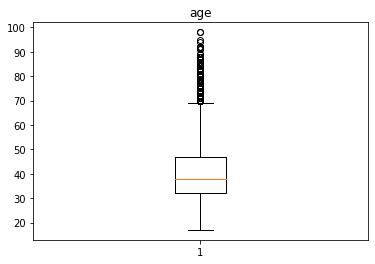

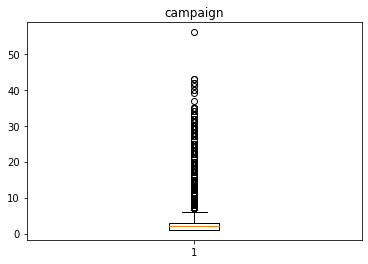

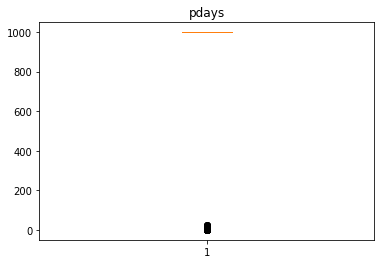

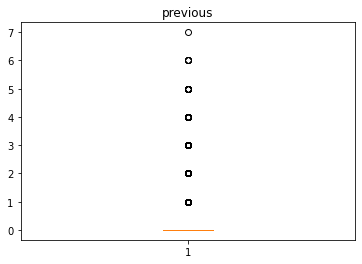

In [ ]:
for var in var_bucket: 
    plt.boxplot(df[var])
    plt.title(var)
    plt.show()

#### 3.4.3 age
- We use a conventional way to categorize age into 10-year age groups.

In [ ]:
ages = [0, 10, 20, 30, 40, 50, 60, 70, 101]
labels = ['0-9','10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_bin'] = pd.cut(df['age'], bins = ages, labels = labels)

#### 3.4.5. pdays
- pdays: number of days that passed by after the client was last contacted from a previous campaign.
    - numeric, 999 means the client was not previously contacted
- Because 81% of the customers were newly contacted for this marketing campaign, rather than counting 'pdays,' we would divide our customers into two groups, either 'new' or 'old.'

In [ ]:
df['pdays'].value_counts(ascending = False)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [ ]:
df['pdays'] = df['pdays'].replace(999, -1)

In [ ]:
df['new_Cust'] = np.where(df['pdays'] == -1, 1, 0)

#### 3.4.6. campaign and previous
- Those two variables mean how often a customer was contacted for the current and previous marketing. 
- Repeated contact might not be usual. We calculate the interquartile range of each feature and create categories 'normal' and 'abnormal' according to the criteria.

In [ ]:
df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

We create a box plot to see the upper and lower limit of data distribution of our data set. 
Regarding contact times of the campaign, one who was contacted more tan six times was considered an outlier.

In [ ]:
q1, q3 = np.percentile(df['campaign'], [25, 75])
iqr = q3 - q1

top = q3 + 1.5 * iqr
bottom = q3 - 1.5 * iqr

top

6.0

In [ ]:
len(df[df['campaign'] > 6])

2406

In [ ]:
df['campaign_abnormal'] = np.where(df['campaign'] > 6, 1, 0)

In [ ]:
df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In the previous feature, we remove the extreme outlier with the value 275 and considered the one with marketing contact more than once is an outlier bolstered by the distribution of our box plot.

In [ ]:
mask = (df['previous'] == 275)

df = df.drop(df[mask].index)

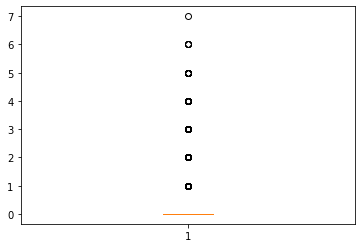

In [ ]:
plt.boxplot(df['previous'])
plt.show()

In [ ]:
q1, q3 = np.percentile(df['previous'], [25, 75])
iqr = q3 - q1

top = q3 + 1.5 * iqr
bottom = q3 - 1.5 * iqr

top

0.0

In [ ]:
len(df[df['previous'] > 1])

1064

In [ ]:
df['previous_abnormal'] = np.where(df['previous'] > 1, 1, 0)

We drop the numerical version of the columns we already transformed into a categorical /one-hot encoding version.

In [ ]:
df.drop(['pdays', 'previous', 'age', 'campaign'], axis=1, inplace=True)

In [ ]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

In [ ]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

We delete this code since we will use unknown feature as one of the values.

In [ ]:
# df['default'] = np.where(df['default'] == 'no', 0, 1)
# df['housing'] = np.where(df['housing'] == 'no', 0, 1)
# df['loan'] = np.where(df['loan'] == 'no', 0, 1)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,new_Cust,campaign_abnormal,previous_abnormal
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-59,1,0,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-59,1,0,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30-39,1,0,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30-39,1,0,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-59,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                41188 non-null  object  
 1   marital            41188 non-null  object  
 2   education          41188 non-null  object  
 3   default            41188 non-null  object  
 4   housing            41188 non-null  object  
 5   loan               41188 non-null  object  
 6   contact            41188 non-null  object  
 7   month              41188 non-null  object  
 8   day_of_week        41188 non-null  object  
 9   poutcome           41188 non-null  object  
 10  emp.var.rate       41188 non-null  float64 
 11  cons.price.idx     41188 non-null  float64 
 12  cons.conf.idx      41188 non-null  float64 
 13  euribor3m          41188 non-null  float64 
 14  nr.employed        41188 non-null  float64 
 15  y                  41188 non-null  int64   
 16  age_

In [ ]:
X = pd.get_dummies(df, columns = ['poutcome', 'month', 'job', 'contact', 'age_bin', 
                                  'day_of_week', 'marital', 
                                  'education', 'default', 'housing', 'loan'])
X = X.drop('y', axis = 1).copy()
y = df['y'].copy()

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
X.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,new_Cust,campaign_abnormal,previous_abnormal,poutcome_failure,poutcome_nonexistent,poutcome_success,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,age_bin_0-9,age_bin_10-19,age_bin_20-29,age_bin_30-39,age_bin_40-49,age_bin_50-59,age_bin_60-69,age_bin_70+,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
X.columns

Index(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'new_Cust', 'campaign_abnormal', 'previous_abnormal',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'age_bin_0-9', 'age_bin_10-19',
       'age_bin_20-29', 'age_bin_30-39', 'age_bin_40-49', 'age_bin_50-59',
       'age_bin_60-69', 'age_bin_70+', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'ed

In [ ]:
import numpy as np
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop = to_drop[1:]
# Drop features
X.drop(to_drop, axis=1, inplace=True)
X.shape

(41188, 64)

In [ ]:
to_drop

['poutcome_success',
 'contact_telephone',
 'default_unknown',
 'housing_yes',
 'loan_unknown']

A data set is divided into features and target variables, and X is one-hot encoded. We are all set to build our model.

# 4. Methodology

### 4.1. Description of the tools used to mine the relevant structure in data. 
- Binary classification is a supervised machine learning task where the goal is to classify examples into one of two classes. The general idea behind a binary classifier is to learn a decision boundary that separates the two classes. 
- We use several data mining models that we have covered in the class, and add few more models to compare model performance. 

    1. Logistic Regression: A linear classifier that models the probability of an example belonging to the positive class as a function of its features. Logistic regression assumes that the relationship between the features and the outcome is linear, and can be sensitive to outliers.
    2. Support Vector Machines (SVMs): A non-linear classifier that maps the examples to a higher-dimensional space where a linear decision boundary can be found. SVMs can be very effective in high-dimensional spaces and are less prone to overfitting.
    3. K-Nearest Neighbors (KNN): A non-parametric classifier that finds the k examples closest to a new example and assigns the class based on a majority vote. KNN can be sensitive to the choice of k and can be computationally expensive for large datasets.
    4. Decision Tree: A hierarchical classifier that recursively partitions the feature space based on the most informative feature at each node. Decision trees can be prone to overfitting and can be sensitive to small changes in the data.
    5. Random Forest: An ensemble classifier that combines multiple decision trees by randomly selecting a subset of features and examples at each node. Random forests can be very effective in high-dimensional spaces and are less prone to overfitting than single decision trees.

### 4.2. Build a model 
#### 4.2.1. Build a model using full features, not including 'duration.'

After cleaning and feature engineering, we split the prepared data using train_test_split(). Splitting a dataset into a training set and a test set is an essential step in the machine learning workflow, as it allows us to evaluate the performance of a model and avoid overfitting.

We use classifier models to predict our binary outcomes: yes (1) or no(0) for service subscriptions after telemarketing. We will use the following techniques and choose the one with high performance: LogisticRegression, SVC, LinearSVC, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, Perceptron, SGDClassifier

In [ ]:
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def run_binary_classification_models(X, y, test_size=0.2):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Define the binary classification models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Neural Networks': MLPClassifier(),
        'KNN' : KNeighborsClassifier(),
        'Perceptron' : Perceptron(), 
        'Stochastic_Gradient_Decent' : SGDClassifier(),
        'Linear_SVC' : LinearSVC()
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train,)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append([name, report['accuracy'], report['0']['precision'], report['1']['precision'], report['0']['recall'], report['1']['recall'], report['0']['f1-score'], report['1']['f1-score']])
    
    # Create a DataFrame to store the results
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1 Score (Class 0)', 'F1 Score (Class 1)'])
    df_results.set_index('Model', inplace=True)
    
    return df_results


In [ ]:
# Run the binary classification models
df_results = run_binary_classification_models(X, y)

# Print the results
print(df_results)

KeyboardInterrupt: ignored

As we seen in our EDA, this data set is highly imbalnced. Our minority class(Yes, 1) only accounts for 11% of the values of the target column.



In [ ]:
y.value_counts()

In [ ]:
# count the different values in the Series
value_counts = y.value_counts()

# calculate the percentage of each value out of the total count
value_percentages = (value_counts / len(y)) * 100

print(value_percentages)

Thus, we now explore using SMOTE to have a better balanced dataset.

#### 4.2.2. Upsamping through SMOTE
SMOTE is a useful technique for upsampling imbalanced datasets and improving the performance of machine learning models. It allows us to address class imbalance, create synthetic samples, avoid overfitting, and improve model performance on the minority class.

In [ ]:
def run_binary_classification_models_with_smote(X, y, test_size=0.2):
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)  
    
    class_weights = {0: 1, 1: 5}
    
    # Define the binary classification models
    models = {
         'Logistic Regression': LogisticRegression(class_weight=class_weights),
        'Decision Tree': DecisionTreeClassifier(class_weight=class_weights),
        'Random Forest': RandomForestClassifier(class_weight=class_weights),
        'SVM': SVC(class_weight=class_weights),
        'Naive Bayes': GaussianNB(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Neural Networks': MLPClassifier(),
        'KNN' : KNeighborsClassifier(),
        'Perceptron' : Perceptron(), 
        'Stochastic_Gradient_Decent' : SGDClassifier(),
        'Linear_SVC' : LinearSVC()
    }
    
    results = []
    for name, model in models.items():
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append([name, report['accuracy'], report['0']['precision'], report['1']['precision'], report['0']['recall'], report['1']['recall'], report['0']['f1-score'], report['1']['f1-score']])
    
    # Create a DataFrame to store the results
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision (Class 0)', 'Precision (Class 1)', 'Recall (Class 0)', 'Recall (Class 1)', 'F1 Score (Class 0)', 'F1 Score (Class 1)'])
    df_results.set_index('Model', inplace=True)
    
    return df_results


In [ ]:
# Run the binary classification models
df_results = run_binary_classification_models_with_smote(X, y)

# Print the results
print(df_results)

Based on all the model results, we believe that Random Forest gives the best result in terms of Accuracy, Precision & Recall.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class_weights = {0: 1, 1: 5}
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) 
rf =  RandomForestClassifier(class_weight = class_weights)
# run_binary_classification_models_with_smote
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.92      0.92      0.92      7303
         Yes       0.40      0.41      0.41       935

    accuracy                           0.86      8238
   macro avg       0.66      0.67      0.66      8238
weighted avg       0.86      0.86      0.86      8238



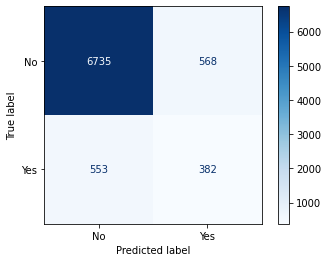

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

cmap = plt.get_cmap('Blues')
disp.plot(cmap=cmap)

plt.show()

Feature importance is a technique used in machine learning to determine the relative importance of each feature (or predictor variable) in a model. In a random forest model, feature importance is typically calculated based on the mean decrease impurity (MDI) of each feature.

In [ ]:
# Extract feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_importances = sorted(zip(X_test.columns, importances), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature_name, importance in sorted_importances:
    print(f'{feature_name}: {importance}')

euribor3m: 0.16783613207601086
housing_no: 0.034444421382602765
nr.employed: 0.03289619947729473
emp.var.rate: 0.030427702188081343
default_no: 0.02725865555980472
marital_married: 0.02588231757507177
age_bin_30-39: 0.025666962993362363
job_admin.: 0.02531400833057437
cons.conf.idx: 0.024245794030405454
marital_single: 0.0235957493119974
age_bin_40-49: 0.022812982768243676
day_of_week_wed: 0.022564844701431216
education_high.school: 0.022102878247947558
day_of_week_mon: 0.02185802332026218
cons.price.idx: 0.021714569875345386
day_of_week_thu: 0.02152083904070501
education_university.degree: 0.02147570087783181
day_of_week_tue: 0.02145893692135519
job_blue-collar: 0.021145220952774227
day_of_week_fri: 0.021140736093058533
campaign_abnormal: 0.019359004216176673
loan_no: 0.019245715534650445
contact_cellular: 0.019186847296294936
age_bin_20-29: 0.019089622534840266
job_technician: 0.0189482655300768
education_basic.9y: 0.017849793449750618
loan_yes: 0.017252239387236162
age_bin_50-59: 0.

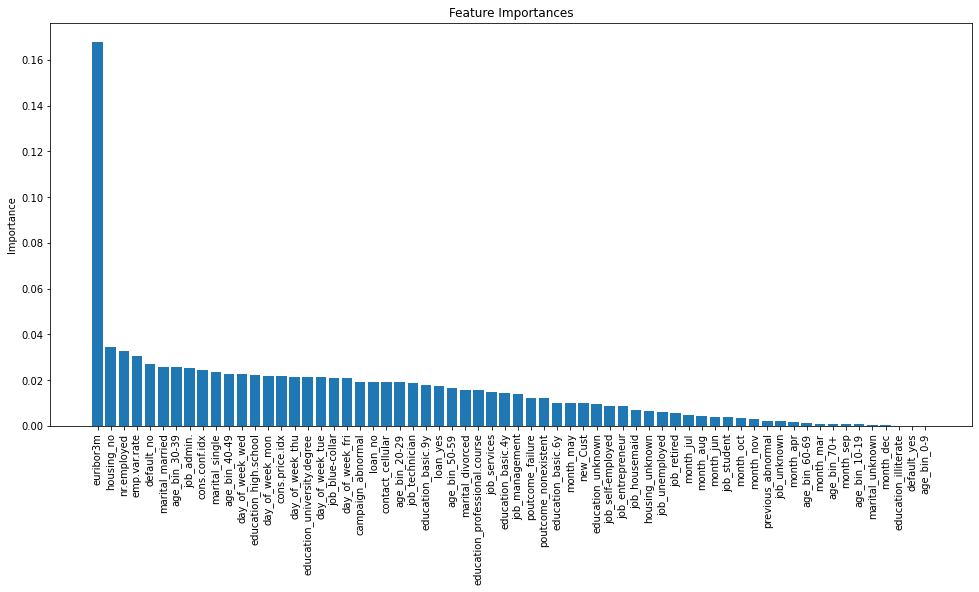

In [ ]:
# Create a figure with a larger size
fig = plt.figure(figsize=(16, 7))

# Create a bar chart
plt.bar([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])

# Add labels and title
plt.ylabel('Importance')
plt.title('Feature Importances')

# Adjust the margins to create extra space on the left and right sides
plt.subplots_adjust(left=0.3, right=0.9)

# Rotate the plot by 90 degrees
plt.gca().set_position((0.1, 0.1, 0.8, 0.8))
plt.gca().set_xticklabels([x[0] for x in sorted_importances], rotation=90)

# Display the plot
plt.show()

In [ ]:
scores = cross_val_score(rf, X, y, cv=10)

# Print the cross-validation scores and their mean
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', np.mean(scores))

Cross-validation scores: [0.8873513  0.84632192 0.12454479 0.74338432 0.67589221 0.34425832
 0.3379461  0.07210488 0.24137931 0.19111219]
Mean cross-validation score: 0.4464295336611005


### 4.3. Improve the Model for Higher Predictive Performance

#### 4.3.1. Evaluating Feature Significances 
-  Feature importances and significances can provide complementary information about the importance of features in a machine learning model. 
- Feature importances focus on the predictive power of each feature, while feature significances focus on the statistical significance of each feature.

In [ ]:
# Create a new DataFrame to store the chi-square statistics and p-values
features_sorted = pd.DataFrame(columns=['Feature', 'Chi-Square', 'P-value'])

# Loop through each categorical feature and calculate its chi-square statistics and p-values
for cat in cat_names:
    # One-hot encode the categorical feature
    X_cat = pd.get_dummies(df[cat], prefix=cat)
    # Calculate the chi-square statistics and p-values
    chi2_stats, p_values = chi2(X_cat, df['y'])
    # Add the results to the features_sorted DataFrame, using the original feature name
    features_sorted.loc[len(features_sorted)] = [cat, chi2_stats.sum(), p_values.min()]

# Sort the features_sorted DataFrame by ascending order of p-value
features_sorted = features_sorted.sort_values(by='P-value')

# Print the sorted DataFrame
print(features_sorted)

In [ ]:
features_sorted[features_sorted['P-value'] > 0.05].loc[:, ['Feature', 'P-value']]

#### 4.3.2. Finding the Best Hyperparameters
- This version is with GridSearchCV to try out different hyperparameters for Random Forest Classifier.
- In machine learning, hyperparameters are parameters that are set before the model is trained, and that cannot be learned from the data.
- By searching over a range of hyperparameters and selecting the best combination, we can tune the model to the specific requirements of the problem and improve its ability to generalize to new, unseen data.

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# # Define the pipeline
# pipeline = imbalanced_make_pipeline(RandomForestClassifier(random_state=42))

# # Define the hyperparameters for the grid search
# params = {
#     'randomforestclassifier__n_estimators': [50, 100, 200, 400, 500],
#     'randomforestclassifier__max_depth': [None, 5, 10, 20, 30],
#     'randomforestclassifier__min_samples_split': [2, 5, 10],
#     'randomforestclassifier__bootstrap': [True],
#     'randomforestclassifier__class_weight': ['balanced', None]
# }

# scoring = ['accuracy', 'precision', 'recall']
# grid_search = GridSearchCV(pipeline, params, scoring=scoring, cv=5, n_jobs=-1, refit='recall')

# # Fit the grid search object on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(grid_search.best_params_)
# print(grid_search.best_score_)


Using the parameters above to fit the model.

In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a new RandomForestClassifier with the best hyperparameters
best_rf = RandomForestClassifier(bootstrap=True, class_weight = None,
                                  max_depth=13, min_samples_split=5,
                                  n_estimators=500, random_state=42)

# Resample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit the best RF model on the resampled training data
best_rf.fit(X_train_res, y_train_res)

# Predict on the testing data
y_pred_train = best_rf.predict(X_train_res)

# Predict on the testing data
y_pred = best_rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)


              precision    recall  f1-score   support

          No       0.95      0.91      0.93      7310
         Yes       0.46      0.61      0.52       928

    accuracy                           0.87      8238
   macro avg       0.70      0.76      0.72      8238
weighted avg       0.89      0.87      0.88      8238



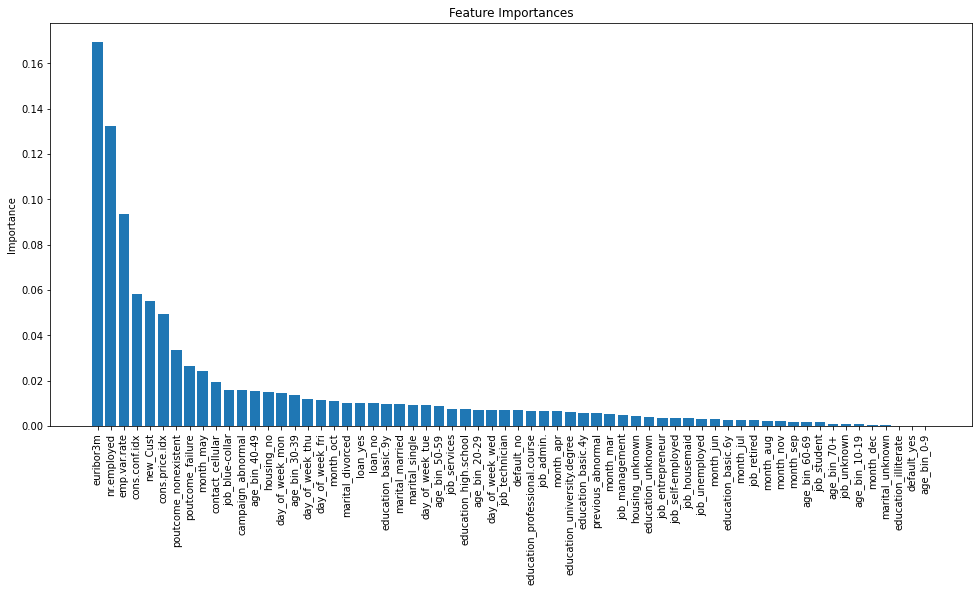

In [ ]:
# Extract feature importances
importances = best_rf.feature_importances_

# Sort feature importances in descending order
sorted_importances = sorted(zip(X_test.columns, importances), key=lambda x: x[1], reverse=True)
    
# Create a figure with a larger size
fig = plt.figure(figsize=(16, 7))

# Create a bar chart
plt.bar([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])

# Add labels and title
plt.ylabel('Importance')
plt.title('Feature Importances')

# Adjust the margins to create extra space on the left and right sides
plt.subplots_adjust(left=0.3, right=0.9)

# Rotate the plot by 90 degrees
plt.gca().set_position((0.1, 0.1, 0.8, 0.8))
plt.gca().set_xticklabels([x[0] for x in sorted_importances], rotation=90)

# Display the plot
plt.show()

In [ ]:
# Calculate the training error
train_error = 1 - accuracy_score(y_train_res, y_pred_train)

# Calculate the cross-validation error
cv_error = 1 - np.mean(cross_val_score(best_rf, X_train_res, y_train_res, cv=5))

In [ ]:
test_error = 1 - accuracy_score(y_test, y_pred)

In [ ]:
print(cv_error)
print(train_error)
print(test_error)

0.19645632202193342
0.17865449073124018
0.12575867929109008


Trying to get model results with a different SMOTE sampling method.

In [ ]:
from imblearn.over_sampling import SMOTE

# Define the desired ratio of each class in the final dataset
sampling_strategy = {0: 36548, 1: 10000}

# Define the SMOTE object with the desired ratio and other parameters
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Fit and transform the SMOTE on the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

best_rf.fit(X_train_res, y_train_res)
y_pred = best_rf.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

              precision    recall  f1-score   support

          No       0.93      0.96      0.94      7310
         Yes       0.57      0.40      0.47       928

    accuracy                           0.90      8238
   macro avg       0.75      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238



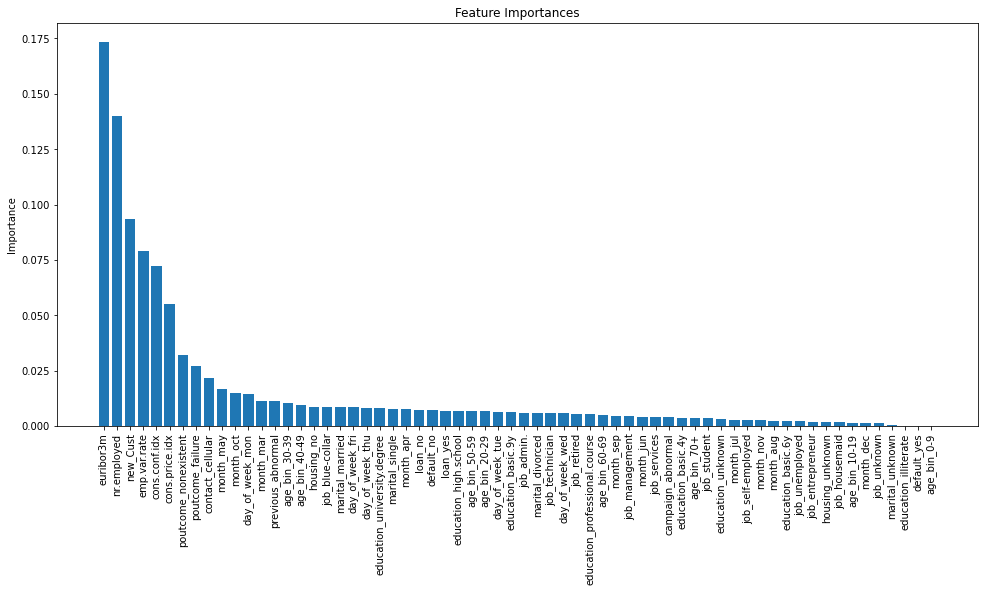

In [ ]:
# Extract feature importances
importances = best_rf.feature_importances_

# Sort feature importances in descending order
sorted_importances = sorted(zip(X_test.columns, importances), key=lambda x: x[1], reverse=True)

# # Print the feature importances
# for feature_name, importance in sorted_importances:
#     print(f'{feature_name}: {importance}')
    
# Create a figure with a larger size
fig = plt.figure(figsize=(16, 7))

# Create a bar chart
plt.bar([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])

# Add labels and title
plt.ylabel('Importance')
plt.title('Feature Importances')

# Adjust the margins to create extra space on the left and right sides
plt.subplots_adjust(left=0.3, right=0.9)

# Rotate the plot by 90 degrees
plt.gca().set_position((0.1, 0.1, 0.8, 0.8))
plt.gca().set_xticklabels([x[0] for x in sorted_importances], rotation=90)

# Display the plot
plt.show()

We also wanted to try XG Boost model as it was a runner up.

In [ ]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # Define the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Define the hyperparameters for the grid search
# params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 1],
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.5, 0.7, 1],
#     'gamma': [0, 0.1, 0.5],
# }

# scoring = ['accuracy', 'precision', 'recall']
# # Define the grid search object
# grid_search = GridSearchCV(xgb_model, params, scoring=scoring, cv=5, n_jobs=-1, refit='recall')

# # Fit the grid search object on the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print(grid_search.best_params_)
# print(grid_search.best_score_)

# # Train the model on the best parameters
# xgb_model = xgb.XGBClassifier(**grid_search.best_params_)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = xgb_model.predict(X_test)

# # Print the classification report and confusion matrix
# report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
# print(report)

# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # Calculate the AUC score
# y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
# auc = roc_auc_score(y_test, y_pred_prob)
# print(f"AUC Score: {auc}")


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print(report)

### 4.4. Description of modeling framework
#### 4.4.1. Model selection justification
#### 4.4.2. Model descriptions
#### 4.4.3. Model engineering /development
    1. SMOTE
        - The data set we have been working on needs to be more balanced. The minority value of the target variable (No, 0) only is up to 11% of the total observations and, therefore, significantly underrepresented.  
        - Therefore, we used SMOTE (Synthetic Minority Over-sampling Technique) to balance out observations.
        - The basic idea behind SMOTE is to create synthetic examples of the minority class by interpolating between existing samples. 
        - It can generate synthetic examples that are more representative of the minority class and can reduce the risk of losing information by under-sampling.
        - It can create noisy examples if the interpolation is done inappropriately. It can also increase the risk of overfitting if the synthetic models are too similar to the original samples. 
    2. Grid Search
        - Grid search is a hyperparameter tuning technique used to optimize the performance of machine learning models. 
        - This is done using a nested cross-validation approach, where the data is split into training, validation, and test sets.
        - Grid search can be computationally expensive, especially for models with many hyperparameters or large datasets.
#### 4.4.4. Validation methodology
    - 10-fold cross-validation by partitioning the data into training and testing sets.
    - Train the model on the training set and evaluate its performance on the testing set.
    - This gives an estimate of the model's performance on new, unseen data.

# 5. Results

### 5.1. Findings 
#### 5.1.1. Interesting findings with descriptive analytics
#### 5.1.2. Important assumptions, metrics, and visual analysis


In [ ]:
# Read the 'bank-full.csv' file into a Pandas dataframe
df_eda = pd.read_csv('/content/drive/Shared drives/DMP Project/Dataset/bank-additional/bank-additional-full.csv', sep=';')

In [ ]:
df_eda['duration_min'] = df_eda['duration'].apply(lambda n:n/60).round(2)

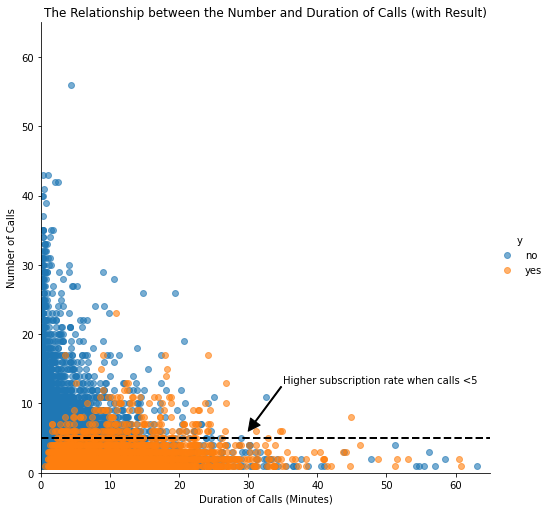

In [ ]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration_min', y='campaign',data = df_eda,
                     hue = 'y',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

In [ ]:
lst = [df_eda]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [ ]:
count_age_response_pct = pd.crosstab(df_eda['y'],df_eda['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

In [ ]:
age = pd.DataFrame(df_eda['age_group'].value_counts())

age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

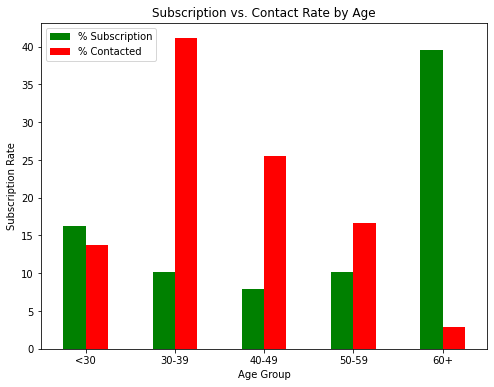

In [ ]:
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Insights: target the youngest and the oldest instead of the middle-aged

Green vertical bars indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest.
The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.
However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

In [ ]:
count_job_response_pct = pd.crosstab(df_eda['y'],df_eda['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()

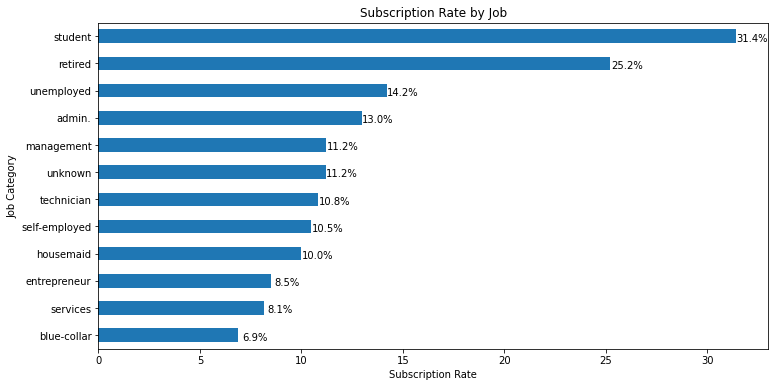

In [ ]:
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

Insights: target students and retired clients

As noted from the horizontal bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older.

In [ ]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [df_eda]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
count_month_response_pct = pd.crosstab(df_eda['y'],df_eda['month_int']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()

In [ ]:
df_eda['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [ ]:
month = pd.DataFrame(df_eda['month_int'].value_counts())
month['% Contacted'] = month['month_int']*100/month['month_int'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month_int',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,10,9,3,12]
month = month.sort_values('Month',ascending = True)

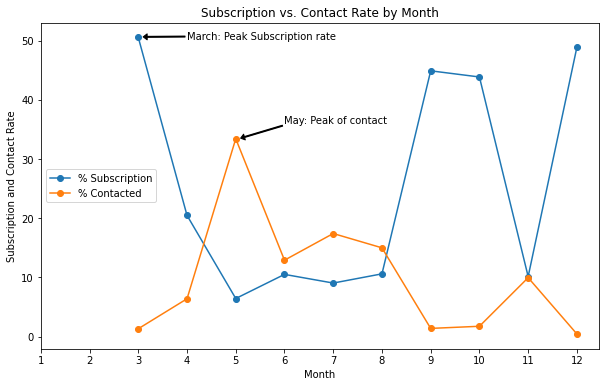

In [ ]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

Insights: initiate the telemarketing campaign in fall or spring

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.

The bank contacted most clients between May and August. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December.
However, the subscription rate showed a different trend. The highest subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.
Clearly, these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future.